Primero me pregunto que es lo que quiero resolver, y resuelvo por armar una propuesta comercial donde le informo al cliente los períodos donde hay una mayor cantidad de conexiones, los lugares, los tipos de conexiones y el incremento porcentual entre cada trimestre.
Descargo los datos necesarios, importo y analizo para luego crear la visualización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Accesos de internet cada 100 hogares

In [117]:
# Importo los datos
internet_penetracion = pd.read_csv('Internet_Penetracion.csv')

# Empiezo la conversión de las columnas del dataframe al tipo que necesito, corrijo los errores en el proceso
internet_penetracion['Accesos por cada 100 hogares'] = internet_penetracion['Accesos por cada 100 hogares'].str.replace(',', '.')
internet_penetracion['Accesos por cada 100 hogares'] = internet_penetracion['Accesos por cada 100 hogares'].astype(float)
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


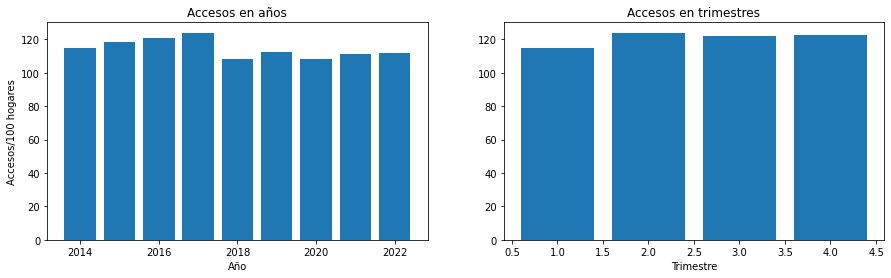

In [36]:
# Imprimo unos gráficas para darme una idea de la distribución de los datos con respecto a lo que estoy buscando.

plt.figure(figsize=(15,4))

plt.subplot(121)
plt.title('Accesos en años')
plt.bar(internet_penetracion['Año'], internet_penetracion['Accesos por cada 100 hogares'])
plt.xlabel('Año')
plt.ylabel('Accesos/100 hogares')

plt.subplot(122)
plt.title('Accesos en trimestres')
plt.bar(internet_penetracion['Trimestre'], internet_penetracion['Accesos por cada 100 hogares'])
plt.xlabel('Trimestre')

plt.show()

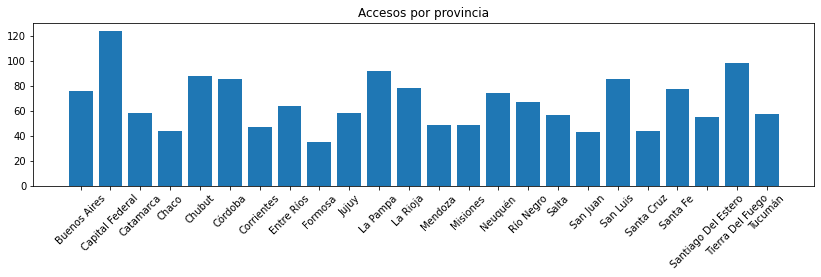

In [54]:
plt.figure(figsize=(14,3))
plt.title('Accesos por provincia')
plt.bar(internet_penetracion['Provincia'], internet_penetracion['Accesos por cada 100 hogares'])
plt.xticks(rotation = 45)
plt.show()

## Velocidad histórica de internet

In [42]:
# Repito el proceso, ahora con el otro dataframe
velocidad_internet = pd.read_csv('historico_velocidad_internet.csv')
velocidad_internet = velocidad_internet.drop_duplicates()
velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     792 non-null    int64 
 1   Trimestre               792 non-null    int64 
 2   Provincia               792 non-null    object
 3   Mbps (Media de bajada)  792 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.9+ KB


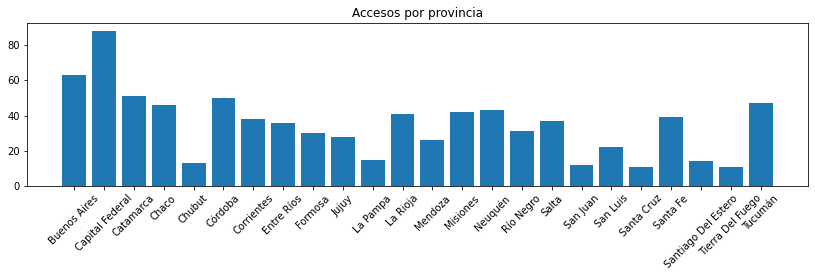

In [52]:
plt.figure(figsize=(14,3))
plt.title('Accesos por provincia')
plt.bar(velocidad_internet['Provincia'], velocidad_internet['Mbps (Media de bajada)'])
plt.xticks(rotation = 45)
plt.show()

## Accesos por tecnología

In [115]:
# Nuevamente, importo el último dataframe que necesito y reitero el proceso
accesos_tecno = pd.read_csv('Internet_Accesos-por-tecnologia.csv')
accesos_tecno = accesos_tecno.drop_duplicates()
accesos_tecno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           793 non-null    object 
 1   Trimestre     793 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    object 
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    object 
dtypes: float64(1), object(8)
memory usage: 62.0+ KB


In [107]:
accesos_tecno.iloc[792]

Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                     NaN
ADSL                                                          NaN
Cablemodem                                                    NaN
Fibra óptica                                                  NaN
Wireless                                                      NaN
Otros                                                         NaN
Total                                                         NaN
Name: 792, dtype: object

In [116]:
accesos_tecno = accesos_tecno[:792]

accesos_tecno['Año'] = accesos_tecno['Año'].str.replace(' *','', regex=True)
accesos_tecno['Año'] = accesos_tecno['Año'].str.replace('*','', regex=True)
accesos_tecno['Año'] = accesos_tecno['Año'].astype(int)

accesos_tecno['Trimestre'] = accesos_tecno['Trimestre'].str.replace(' *','', regex=True)
accesos_tecno['Trimestre'] = accesos_tecno['Trimestre'].str.replace('*','', regex=True)
accesos_tecno['Trimestre'] = accesos_tecno['Trimestre'].astype(int)

accesos_tecno['ADSL']=accesos_tecno['ADSL'].str.replace('.','', regex=True)
accesos_tecno['ADSL']=accesos_tecno['ADSL'].astype(int)

accesos_tecno['Cablemodem']=accesos_tecno['Cablemodem'].str.replace('.','', regex=True)
accesos_tecno['Cablemodem']=accesos_tecno['Cablemodem'].str.replace('- ','', regex=True)
accesos_tecno['Cablemodem']=accesos_tecno['Cablemodem'].astype(int)

accesos_tecno['Fibra óptica']=accesos_tecno['Fibra óptica'].str.replace('.','', regex=True)
accesos_tecno['Fibra óptica']=accesos_tecno['Fibra óptica'].str.replace('- ','', regex=True)
accesos_tecno['Fibra óptica']=accesos_tecno['Fibra óptica'].astype(int)

accesos_tecno['Wireless']=accesos_tecno['Wireless'].str.replace('.','', regex=True)
accesos_tecno['Wireless']=accesos_tecno['Wireless'].str.replace('- ','', regex=True)
accesos_tecno['Wireless']=accesos_tecno['Wireless'].astype(int)

accesos_tecno['Otros']=accesos_tecno['Otros'].to_list()
accesos_tecno['Otros']=accesos_tecno['Otros'].astype(int)

accesos_tecno['Total']=accesos_tecno['Total'].str.replace('.','', regex=True)
accesos_tecno['Total']=accesos_tecno['Total'].astype(int)

accesos_tecno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           792 non-null    int32 
 1   Trimestre     792 non-null    int32 
 2   Provincia     792 non-null    object
 3   ADSL          792 non-null    int32 
 4   Cablemodem    792 non-null    int32 
 5   Fibra óptica  792 non-null    int32 
 6   Wireless      792 non-null    int32 
 7   Otros         792 non-null    int32 
 8   Total         792 non-null    int32 
dtypes: int32(8), object(1)
memory usage: 37.1+ KB


## Exporto a csv para hacer las visualizaciones

In [119]:
# Exporto ahora mis datos limpios para poder cargarlos en Power BI y empezar a trabajar
velocidad_internet.to_csv('./datasets/velocidad_internet.csv', index=False)
internet_penetracion.to_csv('./datasets/internet_penetracion.csv', index=False)
accesos_tecno.to_csv('./datasets/accesos_por_tecnologia.csv', index=False)

## Visualizaciones

In [122]:
from PIL import Image
imagen_tabla = Image.open('./src/Tabla.png')
imagen_accesos_tec = Image.open('./src/Accesos por tecnologia.png')
imagen_accesos_prov = Image.open('./src/Accesos por Provincia.png')
imagen_vel_prov = Image.open('./src/velocidad internet por provincia.png')
imagen_vel_anio = Image.open('./src/Velocidad internet por anio.png')
imagen_calendario = Image.open('./src/Calendario.png')
imagen_medidas = Image.open('./src/Medidas.png')

Luego de importar las tablas, trabajo en dax y creo mi tabla calendario

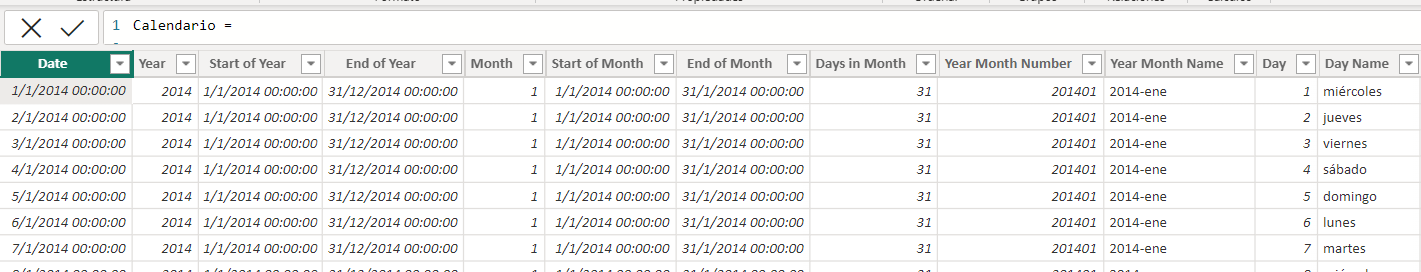

In [123]:
imagen_calendario

Nuevas medidas para poder trabajar y hacer los cálculos

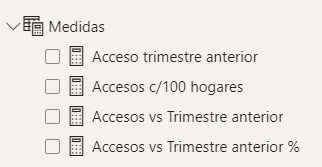

In [124]:
imagen_medidas

Creo un tabla para poder mostrar mi `primer KPI, la diferencia porcentual trimestre a trimestre`, pongo filtros para provincia, año y trimestre

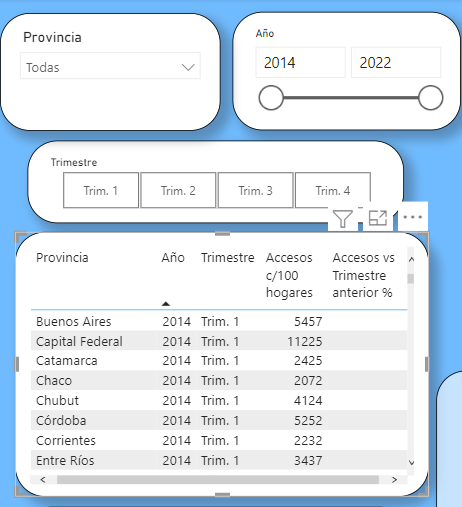

In [125]:
imagen_tabla

Continuo con `mi segundo y tercer KPI's`, ambos con la tabla de accesos por tecnología, pero el gráfico de anillos muestra la distribución de las tecnologías en el período filtrado y las barras apiladas muestran la distribución de las tecnologías en cada ciudad. Esta diferencia es muy importante ya que uno permite visualizar cuales son las tecnologías mas utilizadas, y el otro lo complementa haciendo una diferencia entre cada provincia y así encontrar clientes potenciales.

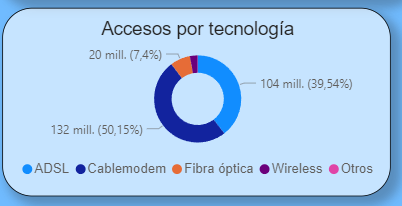

In [130]:
imagen_accesos_tec

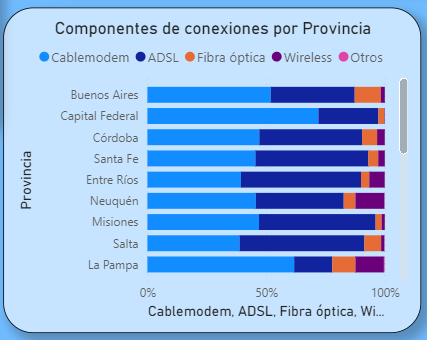

In [131]:
imagen_accesos_prov

Concluyendo con el informe, los  `KPI's restantes fueron realizados con la tabla de velocidad histórica de internet`, ambos son gráficos de lineas, pero uno muestra el promedio de velocidad por provincia en el período filtrado, y el otro muestra la variación de la velocidad a lo largo de los años. Mediante estos KPI's podemos ver la progresión de la misma a través de los años en los distintos sitios, viendo una clara diferencia entre el Norte y Sur con respecto al resto del país. Complementando con los otros KPI's, se observa que la tecnología mas usada de conexión en estas zonas es la conexión inalámbrica, debido a la falta de infraestructura, dando asi la oportunidad de inversión y obtener ese mercado libre.

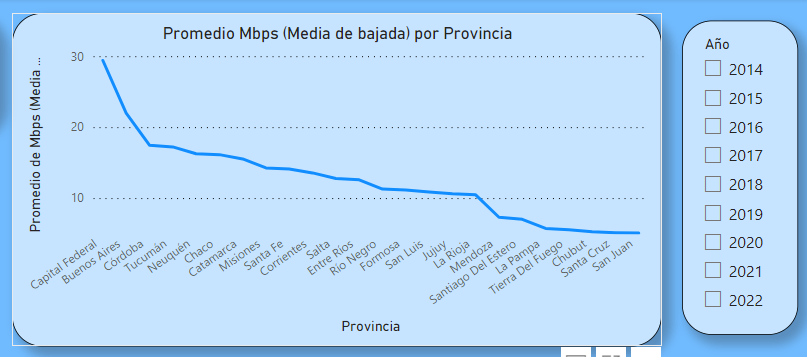

In [132]:
imagen_vel_prov

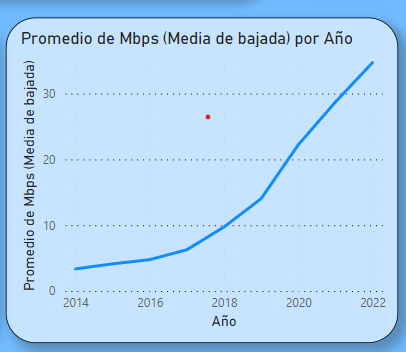

In [133]:
imagen_vel_anio